In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline

In [11]:
# 데이터 불러오기
df0 = pd.read_excel('OTT서비스_이용시간_20230611120446.xlsx')

# 2열부터 9열까지 제거
df0.drop(df0.columns[2:10], axis=1, inplace=True)

# 첫 12행 중 1열부터 추출
df0 = df0.iloc[:12, 1:]

# 1번째 행을 열 이름으로 설정
df0.columns = df0.iloc[0]
df0 = df0[1:]

# '구분별(2)' 열 이름을 '구분'으로 변경
df0.rename(columns={'구분별(2)':'구분'}, inplace=True)

# '구분' 열을 인덱스로 설정
df0 = df0.set_index('구분', inplace=False)

# '30분 미만 (%)' 열을 생성하여 다른 열들의 값을 합산
df0['30분 미만 (%)'] = df0['5분 미만 (%)'] + df0['5분 이상 10분 미만 (%)'] + df0['10분 이상 30분 미만 (%)']

# 필요한 열만 선택하여 새로운 데이터프레임 생성
df0 = df0[['30분 미만 (%)', '30분 이상 1시간 미만 (%)', '1시간 이상 2시간 미만 (%)', '2시간 이상 (%)']]

# 열 이름을 더 간결하게 변경
df0.rename(columns={'30분 미만 (%)':'30분 미만', 
                    '30분 이상 1시간 미만 (%)':'30분 이상 1시간 미만', 
                    '1시간 이상 2시간 미만 (%)':'1시간 이상 2시간 미만', 
                    '2시간 이상 (%)':'2시간 이상'}, inplace=True)

df0

c:\Users\7johs\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,30분 미만,30분 이상 1시간 미만,1시간 이상 2시간 미만,2시간 이상
구분,,,,
소계,35.3,31.9,21,11.9
남,35.4,31.7,21.1,11.8
여,35.2,32,20.8,12
만10대미만,27.8,26.8,23.9,21.6
만10-19세,26.7,30.4,22.4,20.5
만20-29세,24.9,28.9,29.7,16.5
만30-39세,32.9,33.4,20.6,13.2
만40-49세,33.6,35.6,20.3,10.6
만50-59세,44.9,33.2,16.6,5.3


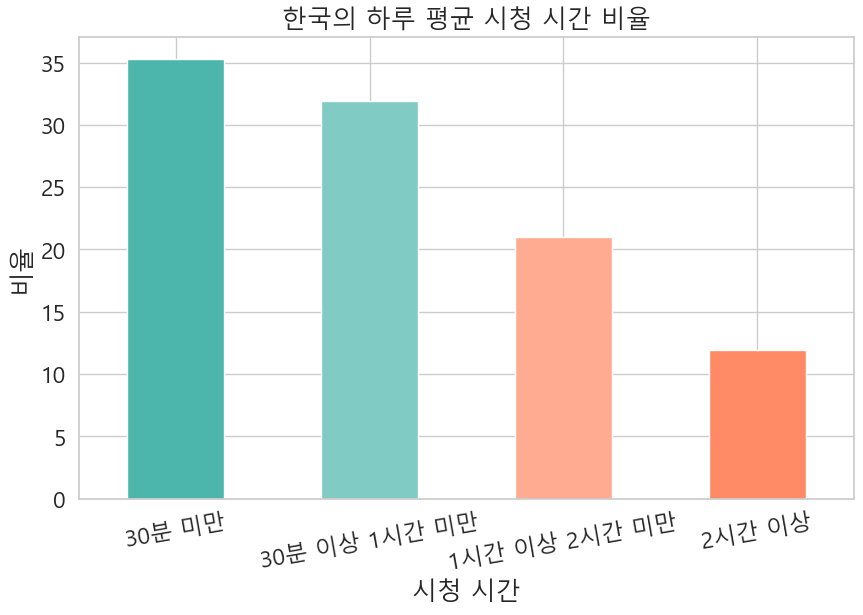

In [12]:
# 전체 데이터 추출
df_total1 = df0.loc['소계']

# 그래프 크기 조정
fig, ax = plt.subplots(figsize=(10, 6))

# 색상 설정
rainbow_colors = ['#4DB6AC', '#80CBC4','#FFAB91', '#FF8A65']

# 막대 그래프 그리기
df_total1.plot(kind='bar', rot = 10, color=rainbow_colors)

# 그래프 제목과 축 레이블 설정
plt.title('한국의 하루 평균 시청 시간 비율')
plt.xlabel('시청 시간')
plt.ylabel('비율')

# 그래프 출력
plt.show()